<a href="https://colab.research.google.com/github/BirundhaManokar/CodeAlpha/blob/main/CodeAlpha_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 3.76k/3.76k [00:00<00:00, 3.12MB/s]

Extracting files...
Dataset downloaded at: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1
Using CSV: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1/car data.csv

Dataset Loaded Successfully!

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'D


--- MODEL PERFORMANCE ---

Linear Regression:
R² Score: 0.33875104359036956
MAE: 2.622629084536095

Random Forest Regressor:
R² Score: 0.5338643449841097
MAE: 1.4224577777777767


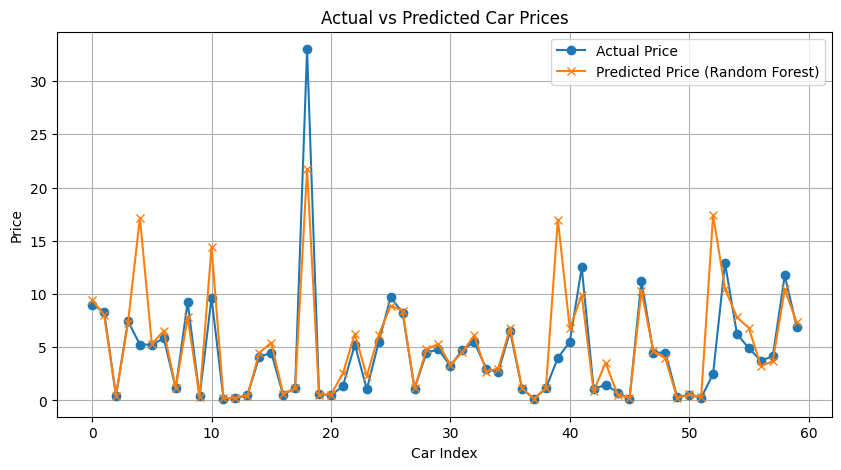


--- REAL-WORLD APPLICATIONS ---
1. Used car platforms (Cars24, CarDekho) use ML to set prices.
2. Helps buyers check if a car is overpriced.
3. Helps sellers get fair value for their cars.
4. Banks use price prediction to approve auto loans.
5. Insurance companies estimate depreciation and risk.


In [ ]:


import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ------------------------------------------------------------
# 1. DOWNLOAD DATASET FROM KAGGLE
# ------------------------------------------------------------

path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print("Dataset downloaded at:", path)

# Automatically detect CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)

if csv_file is None:
    raise FileNotFoundError("No CSV file found in downloaded folder!")

print("Using CSV:", csv_file)

# ------------------------------------------------------------
# 2. LOAD DATASET
# ------------------------------------------------------------

df = pd.read_csv(csv_file)
print("\nDataset Loaded Successfully!\n")
print(df.head())

print("\nColumns:", df.columns.tolist())

# ------------------------------------------------------------
# 3. CLEANING & PREPROCESSING
# ------------------------------------------------------------

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)

# ------------------------------------------------------------
# 4. TRAIN / TEST SPLIT
# ------------------------------------------------------------


target = "Selling_Price"

if target not in df_encoded.columns:
    raise KeyError(f"Target column '{target}' not found. Available columns: {df_encoded.columns}")

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 5. FEATURE SCALING
# ------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 6. TRAIN MODELS
# ------------------------------------------------------------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# ------------------------------------------------------------
# 7. PREDICTIONS AND EVALUATION
# ------------------------------------------------------------

lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test)

print("\n--- MODEL PERFORMANCE ---")

print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))

print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))

# ------------------------------------------------------------
# 8. VISUALIZATION
# ------------------------------------------------------------

plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test.values, marker="o", label="Actual Price")
plt.plot(range(len(y_test)), rf_pred, marker="x", label="Predicted Price (Random Forest)")
plt.xlabel("Car Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 9. REAL-WORLD USE CASES
# ------------------------------------------------------------

print("\n--- REAL-WORLD APPLICATIONS ---")
print("1. Used car platforms (Cars24, CarDekho) use ML to set prices.")
print("2. Helps buyers check if a car is overpriced.")
print("3. Helps sellers get fair value for their cars.")
print("4. Banks use price prediction to approve auto loans.")
print("5. Insurance companies estimate depreciation and risk.")
